<a href="https://colab.research.google.com/github/rootdrew27/data-science/blob/main/My_Naive_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Estimator

This is a naive implementation of a model which I thought of.

It is inspired by **KNN** (K-nearest neighbors)

For each data point it calculates the summed distance to the training data points, respective of class (ie label).

The sums are compared and the class which closer (ie has a lower sum) is determined to be the class of the data point in question.

In [2]:
#@title Import Statements

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
#@title Create Data & DataFrame

from numpy.random import default_rng

rd = default_rng(seed=10)

#data = np.array([[rd.random() * 10, rd.random() * 10] for i in range(10)])

data = np.array([[1, 5, 0], [2, 5, 0], [3, 6, 0], [1,2,1], [2,3,1], [3,3,1]])

column_names = ['x', 'y', 'label']

df = pd.DataFrame(data=data, columns=column_names)

# add label column
# df['label'] = [round(rd.random()) for i in range(10)]

df.head(6)

,x,y,label
0,1,5,0
1,2,5,0
2,3,6,0
3,1,2,1
4,2,3,1
5,3,3,1


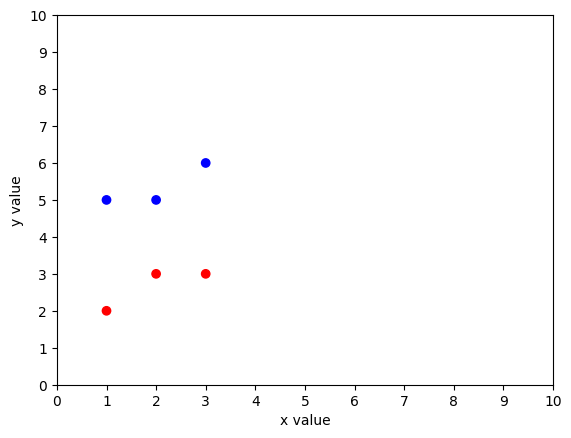

In [52]:
#@title Create Visualization

plt.xlabel('x value')
plt.ylabel('y value')

plt.xlim([0, max(df['x'])+0.5])
plt.ylim([0, max(df['y'])+0.5])

plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(0,11,1))

plt.scatter(df['x'], df['y'], c=df['label'].map(lambda x: 'red' if x == 1 else 'blue'));

In [35]:
# Create matrix of points (integers)
coords = []

for x in range(10):
  row = []
  for y in range(10):
    row.append((x,y))
  coords.append(row)

In [53]:
# Determine what each unlabeled data point would be classified as, using the training data

for row in coords[0:5]: # look at the points {(0,0), (0,1)... (5,9)}
  row = np.array(row)
  for x, y in row:

    # init summed distances
    dist_0 = 0
    dist_1 = 0

    # loop over all training data
    for _, row in df.iterrows():

      # create vectors
      a = np.array((row['x'], row['y']))
      b = np.array((x,y))

      #calc the distance between the unlabeled data point and training data
      dist = np.linalg.norm(a-b)


      if row['label'] == 0:
        # add to the distance to the summed distance from class 0
        dist_0 += dist

      if row['label'] == 1:
        # add to the distance to the summed distance from class 1
        dist_1 += dist

    # if this difference is positive then class 1 is closer
    if dist_1 - dist_0 > 0:
      print(f'Data at the point {(x,y)} would be labeled as Class 0 (ie blue)')
    else:
      print(f'Data at the point {(x,y)} would be labeled as Class 1 (ie red)')

Data at the point (0, 0) would be labeled as Class 1 (ie red)
Data at the point (0, 1) would be labeled as Class 1 (ie red)
Data at the point (0, 2) would be labeled as Class 1 (ie red)
Data at the point (0, 3) would be labeled as Class 1 (ie red)
Data at the point (0, 4) would be labeled as Class 0 (ie blue)
Data at the point (0, 5) would be labeled as Class 0 (ie blue)
Data at the point (0, 6) would be labeled as Class 0 (ie blue)
Data at the point (0, 7) would be labeled as Class 0 (ie blue)
Data at the point (0, 8) would be labeled as Class 0 (ie blue)
Data at the point (0, 9) would be labeled as Class 0 (ie blue)
Data at the point (1, 0) would be labeled as Class 1 (ie red)
Data at the point (1, 1) would be labeled as Class 1 (ie red)
Data at the point (1, 2) would be labeled as Class 1 (ie red)
Data at the point (1, 3) would be labeled as Class 1 (ie red)
Data at the point (1, 4) would be labeled as Class 0 (ie blue)
Data at the point (1, 5) would be labeled as Class 0 (ie blue)
